# IRASA

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

from neurodsp.sim import *
from neurodsp.spectral import compute_spectrum

from fooof.plts import plot_spectrum, plot_spectra

In [2]:
# Import custom code
import sys; from pathlib import Path
sys.path.append(str(Path('..').resolve()))

from apm.run import run_sims
from apm.plts import plot_lines
from apm.plts.settings import AP_COL, COMB_COL

In [3]:
# Import IRASA
from neurodsp.aperiodic import compute_irasa, fit_irasa

## Settings

In [4]:
# Notebook settings
SAVE_FIG = True

In [5]:
# General simulation settings
n_seconds = 10
fs = 1000

# Set frequency range to analyze
f_range = (1, 50)

# Specific settings
default_exp = -1.5
default_freq = 10

# Collect together simulation parameters
sim_params_pow = {'n_seconds' : n_seconds, 'fs' : fs}

sim_params_comb = {'n_seconds' : n_seconds, 'fs' : fs, 
                   'components' : {'sim_powerlaw' : {'exponent' : default_exp},
                                   'sim_oscillation' : {'freq' : default_freq}}}

# Set the paramter ranges to simulate across
exps = np.arange(-3, 0.25, 0.25)
osc_freqs = np.arange(*f_range, 2)
osc_pows = np.arange(0, 3, 0.25)

# Set the number of instances to run
n_instances = 50

# Collect IRASA settings
irasa_params = {'fs' : fs, 'f_range' : f_range}

### Example: Powerlaw Signal

In [6]:
# Simulate a powerlaw signal
sig = sim_powerlaw(n_seconds, fs, default_exp)

In [7]:
# Calculate IRASA and fit exponent
freqs, psd_ap, psd_pe = compute_irasa(sig, **irasa_params)
fit_off, fit_exp = fit_irasa(freqs, psd_ap)

In [8]:
# Compute the full power spectrum
freqs_full, psd_full = compute_spectrum(sig, fs, f_range=f_range)

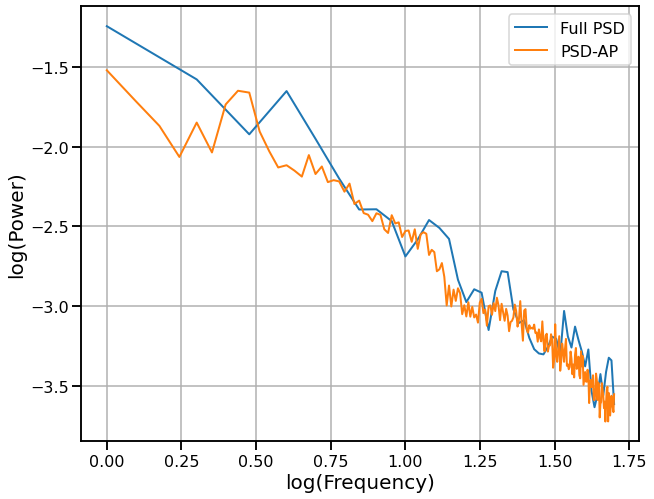

In [9]:
# Compare the full spectrum the IRASA separate aperiodic component
plot_spectra([freqs_full, freqs], [psd_full, psd_ap],
             labels=['Full PSD', 'PSD-AP'],
             log_freqs=True, log_powers=True)

In [10]:
# Check the calculated value against ground truth
print('Measured Exponent:\t {:1.4f}'.format(fit_exp))
print('Expected Exponent:\t {:1.4f}'.format(default_exp))

Measured Exponent:	 -1.3272
Expected Exponent:	 -1.5000


### Example: Combined Signal

In [11]:
# Simulate a powerlaw signal
sig = sim_combined(**sim_params_comb)

In [12]:
# Calculate IRASA and fit exponent
freqs, psd_ap, psd_pe = compute_irasa(sig, **irasa_params)
fit_off, fit_exp  = fit_irasa(freqs, psd_ap)

In [13]:
# Compute the full power spectrum
freqs_full, psd_full = compute_spectrum(sig, fs, f_range=f_range)

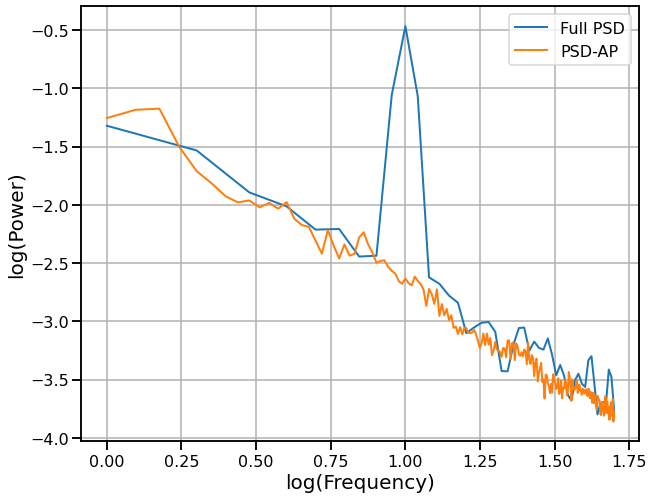

In [14]:
# Compare the full spectrum the IRASA separate aperiodic component
plot_spectra([freqs_full, freqs], [psd_full, psd_ap],
             labels=['Full PSD', 'PSD-AP'],
             log_freqs=True, log_powers=True)

In [15]:
# Check the calculated value against ground truth
print('Measured Exponent:\t {:1.4f}'.format(fit_exp))
print('Expected Exponent:\t {:1.4f}'.format(default_exp))

Measured Exponent:	 -1.5622
Expected Exponent:	 -1.5000


### Example: Knee Signal

In [16]:
# Expected exponent for a synpatic activity signal, with a knee
exp_kn = -2

In [17]:
# Simulate a signal with a knee
sig_kn = sim_synaptic_current(n_seconds, fs)

In [18]:
# Calculate IRASA and fit exponent
freqs, psd_ap, psd_pe = compute_irasa(sig_kn, **irasa_params)
fit_off, fit_exp  = fit_irasa(freqs, psd_ap)

In [19]:
# Compute the full power spectrum
freqs_full, psd_full = compute_spectrum(sig_kn, fs, f_range=f_range)

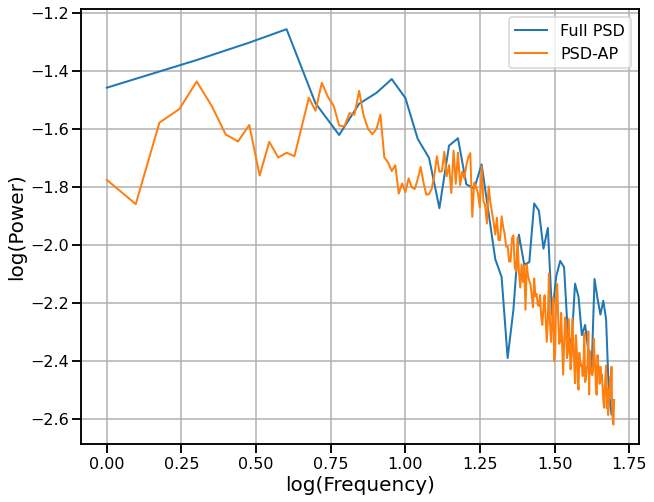

In [20]:
# Compare the full spectrum the IRASA separate aperiodic component
plot_spectra([freqs_full, freqs], [psd_full, psd_ap],
             labels=['Full PSD', 'PSD-AP'],
             log_freqs=True, log_powers=True)

In [21]:
# Check the calculated value against ground truth
print('Measured Exponent:\t {:1.4f}'.format(fit_exp))
print('Expected Exponent:\t {:1.4f}'.format(exp_kn))

Measured Exponent:	 -0.7936
Expected Exponent:	 -2.0000


### Helper Functions

In [22]:
def irasa_wrapper(sig, **kwargs):
    
    freqs, psd_ap, psd_pe = compute_irasa(sig, **irasa_params)
    return fit_irasa(freqs, psd_ap)[1]

## IRASA Simulation Tests

### Powerlaw Signals - Across Exponents

In [23]:
# Run a set of simulations, calculating IRASA estimation across exponents
irasa_sims_exp = run_sims(sim_powerlaw, sim_params_pow, irasa_wrapper, irasa_params,
                          update='update_exp', values=exps, n_instances=n_instances)

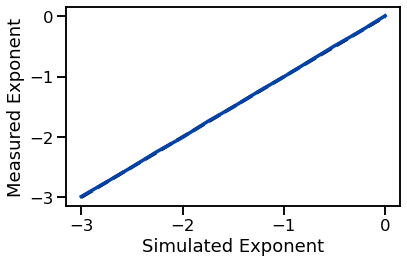

In [24]:
# Plot IRASA estimation across exponents
plot_lines(exps, exps, color='k', linestyle='--')
plot_lines(exps, irasa_sims_exp, color=AP_COL)
plot_lines(xlabel='Simulated Exponent', ylabel='Measured Exponent')
plot_lines(save_fig=SAVE_FIG, file_name='irasa_exp', file_path='irasa')

### Powerlaw Signals with Oscillations - Across Exponents

In [25]:
# Run a set of simulations, calculating IRASA estimation across exponents
irasa_sims_comb_exp = run_sims(sim_combined, sim_params_comb, irasa_wrapper, irasa_params,
                               update='update_comb_exp', values=exps, n_instances=n_instances)

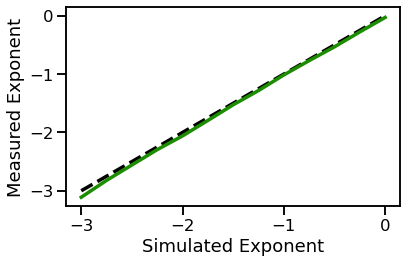

In [26]:
# Plot IRASA estimation across exponents, with an oscillation
plot_lines(exps, exps, color='k', linestyle='--')
plot_lines(exps, irasa_sims_comb_exp, color=COMB_COL)
plot_lines(xlabel='Simulated Exponent', ylabel='Measured Exponent')
plot_lines(save_fig=SAVE_FIG, file_name='irasa_comb', file_path='irasa')

### Plot Powerlaw with & without Oscillations

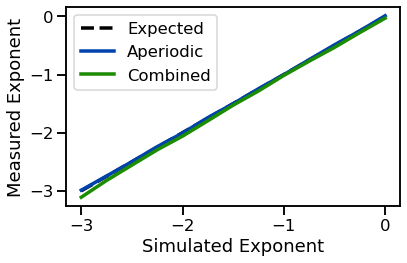

In [27]:
# Plot IRASA estimation across exponents, both with and without oscillation
plot_lines(exps, exps, color='k', linestyle='--', label='Expected')
plot_lines(exps, irasa_sims_exp, color=AP_COL, label='Aperiodic')
plot_lines(exps, irasa_sims_comb_exp, color=COMB_COL, label='Combined')
plot_lines(xlabel='Simulated Exponent', ylabel='Measured Exponent')
plot_lines(save_fig=SAVE_FIG, file_name='irasa_both', file_path='irasa')

### Powerlaw Signals with Oscillations - Across Oscillation Frequency

In [28]:
# Run a set of simulations, calculating IRASA across oscillation frequencies
irasa_sims_freq = run_sims(sim_combined, sim_params_comb, irasa_wrapper, irasa_params,
                           update='update_freq', values=osc_freqs, n_instances=n_instances)

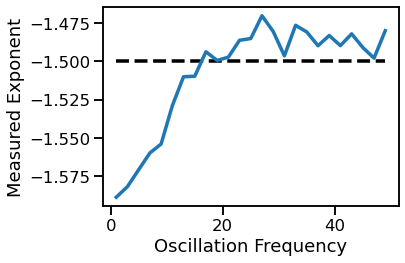

In [29]:
# Plot IRASA estimation across oscillation frequency values
plot_lines(osc_freqs, [default_exp]*len(osc_freqs),  color='k', linestyle='--')
plot_lines(osc_freqs, irasa_sims_freq)
plot_lines(xlabel='Oscillation Frequency', ylabel='Measured Exponent')
plot_lines(save_fig=SAVE_FIG, file_name='irasa_osc_freq', file_path='irasa')

### Powerlaw Signals with Oscillations - Across Oscillation Power

In [30]:
# Run a set of simulations, calculating IRASA across oscillation power
irasa_sims_pow = run_sims(sim_combined, sim_params_comb, irasa_wrapper, irasa_params,
                          update='update_pow', values=osc_pows, n_instances=n_instances)

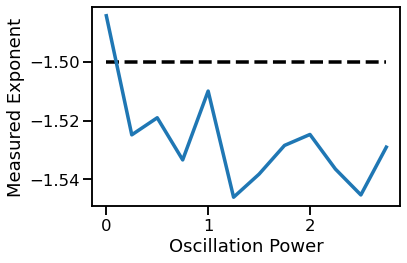

In [31]:
# Plot IRASA estimation across oscillation power values
plot_lines(osc_pows, [default_exp]*len(osc_pows), color='k', linestyle='--')
plot_lines(osc_pows, irasa_sims_pow)
plot_lines(xlabel='Oscillation Power', ylabel='Measured Exponent')
plot_lines(save_fig=SAVE_FIG, file_name='irasa_osc_power', file_path='irasa')